In [15]:
import seaborn as sns
import pandas as pd
from pylab import * 
%matplotlib inline
sns.set_context("talk")

In [16]:
fa_pos = !find data/region25/possitiv/ -iname "*.fa"
fa_neg = !find data/region25/negativ/ -iname "*.fa"

In [17]:
aas = "ACDEFGHIKLMNPQRSTVWY"
aa_groups = {
    "positive": "RHK",
    "negative": "DE",
    "nonpolar": "GAVLIMFWP",
    "polar": "STCYNQ"
}

In [18]:
disordered = []
normal = []
for fa in fa_pos:
    with open(fa) as f:
        f.readline()
        seq = f.readline()
        disordered.append(seq)
for fa in fa_neg:
    with open(fa) as f:
        f.readline()
        seq = f.readline()
        normal.append(seq)

In [19]:
def count_aas(seqs, normalize = True):
    counts = {aa: 0 for aa in aas}
    for seq in seqs:
        for aa in aas:
            counts[aa] += seq.count(aa)
    if normalize: 
        total = sum(list(counts.values()))
        counts_norm = {}
        counts_norm = {aa : counts[aa] / total for aa in aas}
        return counts_norm
    else:
        return counts

In [20]:
counts_disordered = count_aas(disordered)
counts_normal = count_aas(normal)

In [21]:
counts_disordered

{'A': 0.078747390396659706,
 'C': 0.0073486430062630484,
 'D': 0.066972860125260963,
 'E': 0.096701461377870571,
 'F': 0.025553235908141961,
 'G': 0.073569937369519833,
 'H': 0.022296450939457202,
 'I': 0.02872651356993737,
 'K': 0.07657620041753653,
 'L': 0.061628392484342383,
 'M': 0.021210855949895614,
 'N': 0.032651356993736953,
 'P': 0.072985386221294357,
 'Q': 0.061878914405010435,
 'R': 0.057286012526096032,
 'S': 0.085929018789144052,
 'T': 0.054112734864300627,
 'V': 0.046764091858037579,
 'W': 0.0063465553235908141,
 'Y': 0.022713987473903966}

In [22]:
counts_normal

{'A': 0.076639741518578358,
 'C': 0.016025848142164782,
 'D': 0.052730210016155091,
 'E': 0.06907915993537965,
 'F': 0.036704361873990309,
 'G': 0.069208400646203552,
 'H': 0.02087237479806139,
 'I': 0.047560581583198709,
 'K': 0.059063004846526657,
 'L': 0.090403877221324716,
 'M': 0.023263327948303717,
 'N': 0.042067851373182551,
 'P': 0.062552504038772216,
 'Q': 0.050533117932148625,
 'R': 0.053311793214862679,
 'S': 0.074313408723747976,
 'T': 0.04949919224555735,
 'V': 0.064103392568659129,
 'W': 0.012277867528271405,
 'Y': 0.029789983844911147}

In [23]:
df = pd.DataFrame({"disordered": list(counts_disordered.values()), "well-structured": list(counts_normal.values())}, index= list(counts_disordered.keys()))

In [24]:
df = df.sort_index()

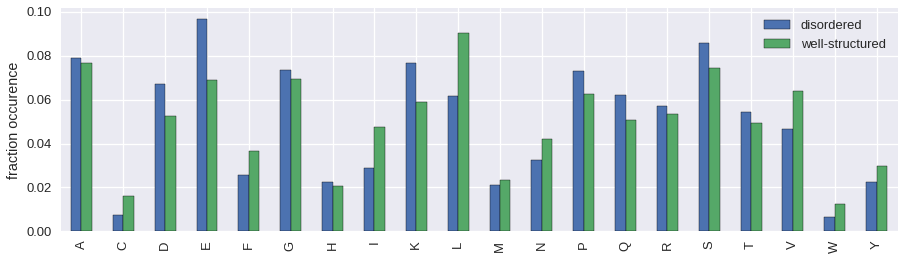

In [46]:
fig, ax = subplots(figsize=(15,4))
df.plot.bar(ax = ax)
ax.set_ylabel("fraction occurence")
fig.savefig("pres/img/aacomp.pdf")

## count groups

In [26]:
disordered_grouped = {k: 0 for k in aa_groups.keys()}
normal_grouped = {k: 0 for k in aa_groups.keys()}

for group, gaas in aa_groups.items():
    for aa in gaas:
        disordered_grouped[group] += counts_disordered[aa]
        normal_grouped[group] += counts_normal[aa]

In [27]:
dfg = pd.DataFrame({"disordered": list(disordered_grouped.values()), "well-structured": list(normal_grouped.values())}, index=list(normal_grouped.keys()))

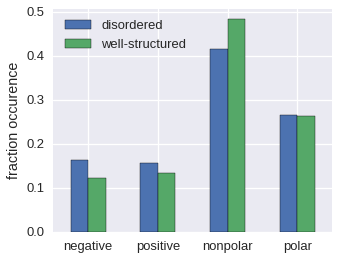

In [47]:
fig, ax = subplots(figsize=(5,4))
dfg.plot.bar(ax = ax)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_ylabel("fraction occurence")
fig.savefig("pres/img/aacomp_group.pdf")